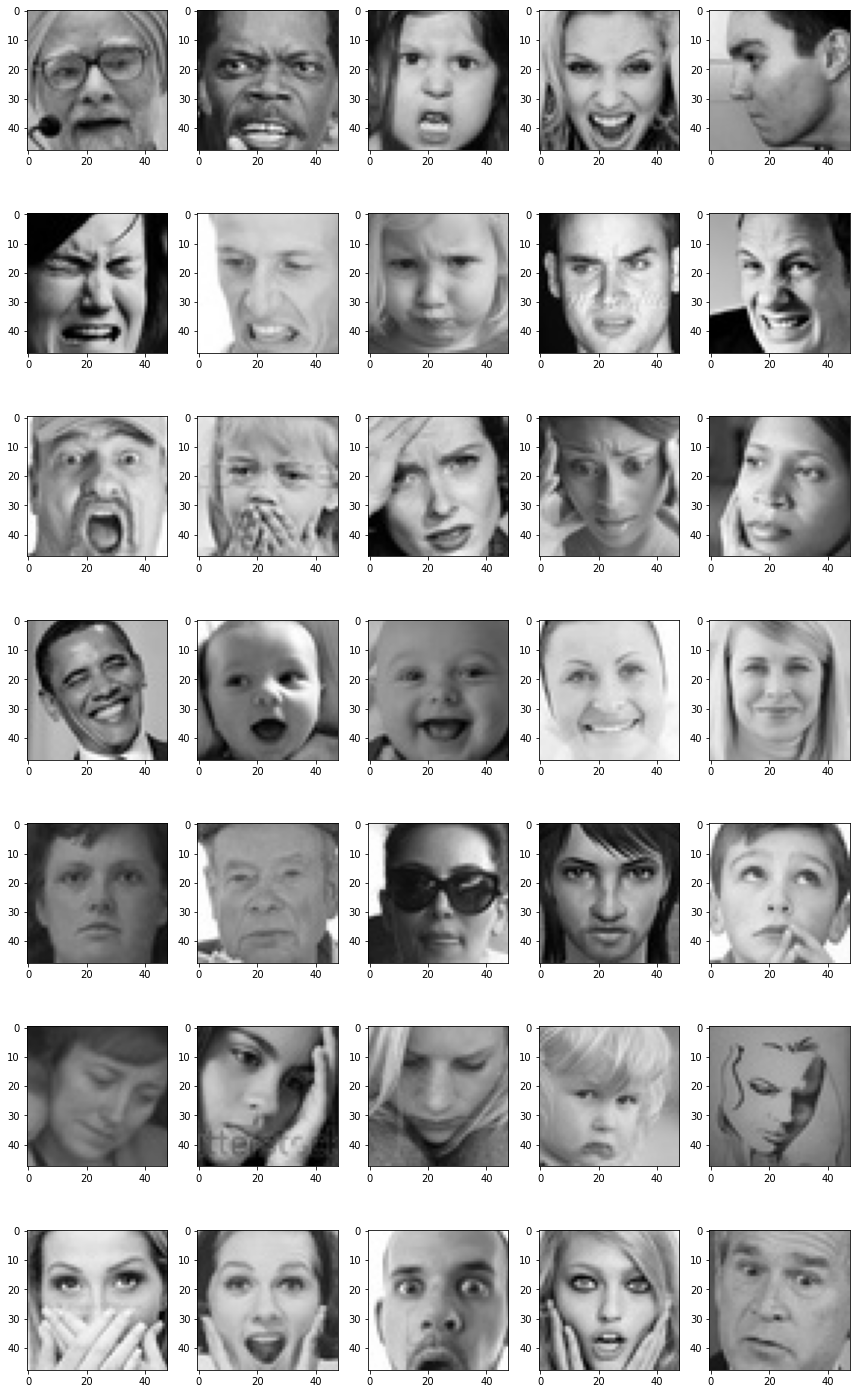

In [5]:
# display some images for every different expression 
import numpy as np 
import seaborn as sns 
from keras_preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt 
import os 
# size of the image: 48*48 pixels 
pic_size = 48 
# input path for the images 
base_path = "./input/images/images/" 
plt.figure(0, figsize=(12,20)) 
cpt = 0 
for expression in os.listdir(base_path + "train/"):
    for i in range(1,6):
        cpt = cpt + 1
        plt.subplot(7,5,cpt)
        img = load_img(base_path + "train/" + expression + "/" +os.listdir(base_path + "train/" + expression)[i], target_size=(pic_size, pic_size))
        plt.imshow(img, cmap="gray")
        
plt.tight_layout()
#plt.show()

In [6]:
# count number of train images for each expression 
for expression in os.listdir(base_path + "train"): 
    print(str(len(os.listdir(base_path + "train/" + expression))) + " " + expression + " images")


3993 angry images
436 disgust images
4103 fear images
7164 happy images
4982 neutral images
4938 sad images
3205 surprise images


In [8]:
from keras_preprocessing.image import ImageDataGenerator 
# number of images to feed into the NN for every batch 
batch_size = 128 
datagen_train = ImageDataGenerator() 
datagen_validation = ImageDataGenerator() 
train_generator = datagen_train.flow_from_directory(base_path + "train", target_size=(pic_size,pic_size),
                                                    color_mode="grayscale", batch_size=batch_size,          
                                                    class_mode='categorical', shuffle=True) 
validation_generator = datagen_validation.flow_from_directory(base_path + "validation", target_size=(pic_size,
                                                            pic_size), color_mode="grayscale", 
                                                            batch_size=batch_size, class_mode='categorical', 
                                                            shuffle=False)



Using TensorFlow backend.


Found 28821 images belonging to 7 classes.


Using TensorFlow backend.


Found 7066 images belonging to 7 classes.


In [ ]:

from keras.layer import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D 
from keras.models import Model, Sequential 
from keras.optimizers import Adam 
# number of possible label values 
nb_classes = 7 
# Initialising the CNN 
model = Sequential() 
# 1 - Convolution 
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1))) 
model.add(BatchNormalization()) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.25)) 
# 2nd Convolution layer model.add(Conv2D(128,(5,5), padding='same')) 
model.add(BatchNormalization()) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.25)) 
# 3rd Convolution layer 
model.add(Conv2D(512,(3,3), padding='same')) 
model.add(BatchNormalization()) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.25)) 
# 4th Convolution layer 
model.add(Conv2D(512,(3,3), padding='same')) 
model.add(BatchNormalization()) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.25)) 
# Flattening 
model.add(Flatten()) 
# Fully connected layer 1st layer 
model.add(Dense(256)) 
model.add(BatchNormalization()) 
model.add(Activation('relu')) 
model.add(Dropout(0.25)) 
# Fully connected layer 2nd layer 
model.add(Dense(512)) 
model.add(BatchNormalization()) 
model.add(Activation('relu')) 
model.add(Dropout(0.25)) 
model.add(Dense(nb_classes, activation='softmax')) 
opt = Adam(lr=0.0001) 
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


In [35]:
# number of epochs to train the NN 
epochs = 50 
from keras.callbacks import ModelCheckpoint 
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max') 
callbacks_list = [checkpoint] 
history = model.fit_generator(generator=train_generator, steps_per_epoch=train_generator.n//train_generator.batch_size, epochs=epochs, validation_data = validation_generator, validation_steps = validation_generator.n//validation_generator.batch_size, callbacks=callbacks_list )


Epoch 1/50
225/225 [==============================] - ETA: 0s - loss: 1.9804 - accuracy: 0.2531WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001E402626828> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
225/225 [==============================] - 585s 3s/step - loss: 1.

Epoch 25/50
225/225 [==============================] - 462s 2s/step - loss: 1.1078 - accuracy: 0.5785 - val_loss: 1.1655 - val_accuracy: 0.5598
Epoch 26/50
225/225 [==============================] - 458s 2s/step - loss: 1.0937 - accuracy: 0.5844 - val_loss: 1.1369 - val_accuracy: 0.5739
Epoch 27/50
225/225 [==============================] - 457s 2s/step - loss: 1.0835 - accuracy: 0.5890 - val_loss: 1.1642 - val_accuracy: 0.5598
Epoch 28/50
225/225 [==============================] - 459s 2s/step - loss: 1.0686 - accuracy: 0.5911 - val_loss: 1.1543 - val_accuracy: 0.5649
Epoch 29/50
225/225 [==============================] - 460s 2s/step - loss: 1.0508 - accuracy: 0.6035 - val_loss: 1.1439 - val_accuracy: 0.5737
Epoch 30/50
225/225 [==============================] - 460s 2s/step - loss: 1.0405 - accuracy: 0.6052 - val_loss: 1.1084 - val_accuracy: 0.5849
Epoch 31/50
225/225 [==============================] - 459s 2s/step - loss: 1.0348 - accuracy: 0.6087 - val_loss: 1.1206 - val_accuracy:

In [36]:
# serialize model structure to JSON 
model_json = model.to_json() 
with open("model.json", "w") as json_file:
    json_file.write(model_json)


In [ ]:
# plot the evolution of Loss and Acuracy on the train and validation sets 
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,10)) 
plt.subplot(1, 2, 1) 
plt.suptitle('Optimizer : Adam', fontsize=10) 
plt.ylabel('Loss', fontsize=16) 
plt.plot(history.history['loss'], label='Training Loss') 
plt.plot(history.history['val_loss'], label='Validation Loss') 
plt.legend(loc='upper right') 
plt.subplot(1, 2, 2) 
plt.ylabel('Accuracy', fontsize=16) 
plt.plot(history.history['accuracy'], label='Training Accuracy') 
plt.plot(history.history['val_accuracy'], label='Validation Accuracy') 
plt.legend(loc='lower right') 
plt.show()
#plt.savefig('history')


<Figure size 432x288 with 0 Axes>

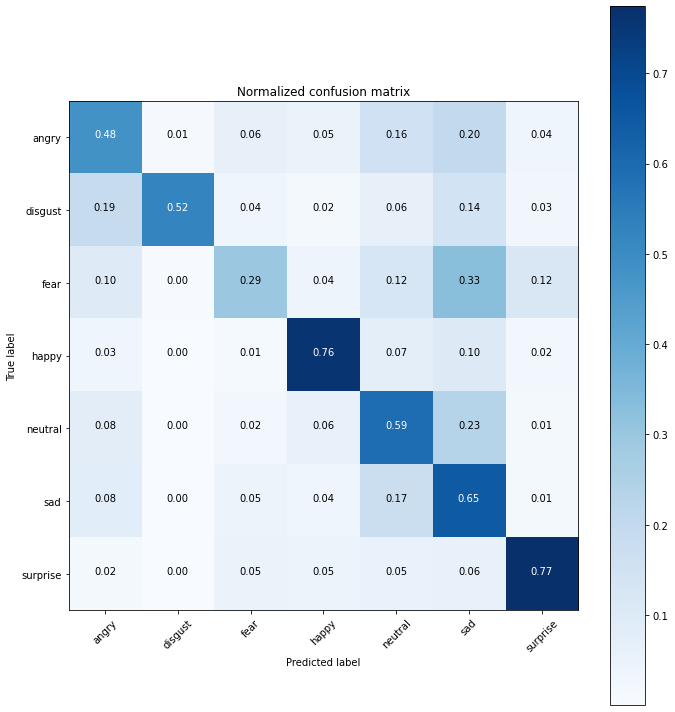

<Figure size 432x288 with 0 Axes>

In [52]:
# show the confusion matrix of our predictions 
# compute predictions 
predictions = model.predict_generator(generator=validation_generator) 
y_pred = [np.argmax(probas) for probas in predictions] 
y_test = validation_generator.classes 
class_names = validation_generator.class_indices.keys() 

from sklearn.metrics import confusion_matrix 
import itertools 

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues): 
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] 
    plt.figure(figsize=(10,10)) 
    plt.imshow(cm, interpolation='nearest', cmap=cmap) 
    plt.title(title) 
    plt.colorbar() 
    tick_marks = np.arange(len(classes)) 
    plt.xticks(tick_marks, classes, rotation=45) 
    plt.yticks(tick_marks, classes) 
    fmt = '.2f' 
    thresh = cm.max() / 2. 

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])): 
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black") 
        plt.ylabel('True label') 
        plt.xlabel('Predicted label') 
        plt.tight_layout() 

# compute confusion matrix 
cnf_matrix = confusion_matrix(y_test, y_pred) 
np.set_printoptions(precision=2) 

# plot normalized confusion matrix 
plt.figure() 
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix') 
plt.show()
plt.savefig('matrix')

